*Library*

In [9]:
import numpy as np
import pandas as pd
import pylab
import scipy.stats as stats

Two sample testing for proportion
Suppose the Acme Drug Company develops a new drug, designed to prevent colds. The company states that the
drug is equally effective for men and women. To test this claim, they choose a simple random sample of 100
women and 200 men from a population of 100,000 volunteers.
At the end of the study, 38% of the women caught a cold; and 51% of the men caught a cold.

State the null hypothesis H0 and the alternative one HA

The H0 is this drug is effective for both men and woman and HA is the effective is different for men and woman.

Perform a z test to answer this question. Conclude

In [9]:
women_mean_sick = 0.38
men_mean_sick = 0.51
women_mean_normal = 1 - 0.38
men_mean_normal = 1 - 0.51
men_variance = men_mean_sick*men_mean_normal
women_variance = women_mean_sick*women_mean_normal

z_test = (men_mean_sick-women_mean_sick)/np.sqrt(men_variance/200 + women_variance/100)
z_test

2.165013468123085

Zcritical region

In [7]:
from scipy.stats import norm
zcritical=norm.ppf(1-0.05)
zcritical

1.6448536269514722

The rejection region is the area to the left of -1.64 and to the right of 1.64. 2.16 is to the right of 1.96,
thus we Reject H0

Two sample testing on the iris dataset
The data used in this example is from Kaggle.com and was posted by the user Web IR. The link to the data set
is here https://www.kaggle.com/webirlab/iris-data/data. The data set contains the sepal and petal length
and width of various floral species. We will be testing to see if there is a significant difference in the sepal width
between the species Iris-setosa and Iris-versicolor which are variables “sepal width” and “species” respectively.

Import the data using read csv.

In [5]:
Iris_Data = pd.read_csv('Iris_Data.csv')
Iris_Data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Comment the following command line.

In [6]:
# df.groupby("species")[’sepal width’].describe()
Iris_Data.groupby("species")["sepal_width"].describe()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50.0,3.418,0.381024,2.3,3.125,3.4,3.675,4.4
Iris-versicolor,50.0,2.770,0.313798,2.0,2.525,2.8,3.000,3.4
Iris-virginica,50.0,2.974,0.322497,2.2,2.800,3.0,3.175,3.8


Create 2 data frames that are subsets of the original data where each data frame only contains data for a
respective flower species

In [7]:
setosa = Iris_Data[(Iris_Data["species"] == "Iris-setosa")]
versicolor = Iris_Data[(Iris_Data["species"] == "Iris-versicolor")]

We now want to perform a t-test
Test equality of variances using the function levene of the library scipy.stats. Can we accept the
hypothesis of equality of variances of the two samples?

In [8]:
from scipy.stats import levene
stat, p = levene(setosa.sepal_width,versicolor.sepal_width)
p

0.41728596812962093

Is the sepal width a Gaussian variable. Display a QQ-plot using probplot of the library scipy.stats
to answer this question.

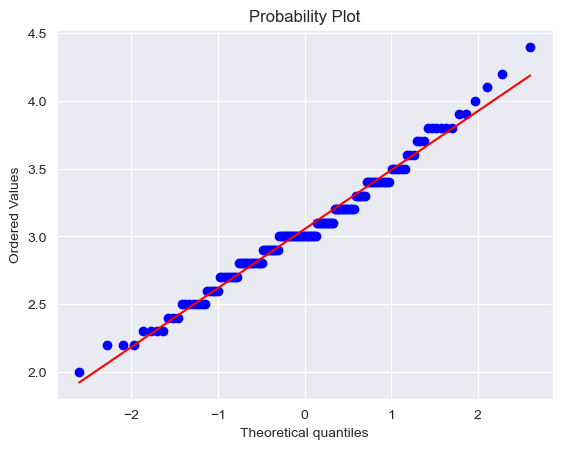

In [10]:
stats.probplot(Iris_Data["sepal_width"], dist="norm", plot=pylab)
pylab.show()

Perform a t-test using ttest ind. What is your conclusion?

In [11]:
stats.ttest_rel(setosa.sepal_width,versicolor.sepal_width)

Ttest_relResult(statistic=8.846695040854682, pvalue=9.989211333619151e-12)

Since the p-value is less than 0.05, we reject the null hypothesis. We have sufficient evidence to say that the true mean test score is different for two different flowers.